# **Imports**

In [1]:
%%capture
'''!pip install numpy==1.26.4
!pip install pandas
!pip install matplotlib
!pip install nltk
!pip install git+https://github.com/antonio258/npp.git
!python -m spacy download pt_core_news_sm'''


In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gabrielprenassi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd
import re
from unicodedata import normalize
from pre_processing import PreProcessing
import numpy as np
import spacy as sp
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# **Data**

In [4]:
df = pd.read_csv('../data/SUS_Simulador_Aposentadoria.csv')
df = df.dropna(subset=['Você conhece e já utilizou o Simulador de Aposentadoria no SOUGOV.BR?']).reset_index(drop=True)
df

,ID,Você conhece e já utilizou o Simulador de Aposentadoria no SOUGOV.BR?,Acho que gostaria de utilizar o Simulador de Aposentadoria com frequência,1\nAcho que gostaria de utilizar o Simulador de Aposentadoria com frequência,Eu achei o Simulador de Aposentadoria muito complexo,2\nEu achei o Simulador de Aposentadoria muito complexo,Eu achei o Simulador de Aposentadoria fácil de usar,3\nEu achei o Simulador de Aposentadoria fácil de usar,Eu acho que precisaria de ajuda de uma pessoa com conhecimentos específicos para usar o Simulador de Aposentadoria,4\nEu acho que precisaria de ajuda de uma pessoa com conhecimentos específicos para usar o Simulador de Aposentadoria,...,Eu achei o Simulador de Aposentadoria difícil de usar,8\nEu achei o Simulador de Aposentadoria difícil de usar,Eu me senti confiante usando o Simulador de Aposentadoria,9\nEu me senti confiante usando o Simulador de Aposentadoria,"Eu precisei aprender várias coisas novas antes de conseguir usar o Simulador de Aposentadoria. ,opcao:","10\nEu precisei aprender várias coisas novas antes de conseguir usar o Simulador de Aposentadoria. ,opcao:2","Agradeço a sua participação e abro o espaço para que você possa contribuir com alguma crítica, sugestão ou elogio sobre o Simulador de Aposentadoria.","Some a pontuação total de todas as questões ímpares (questões 1, 3, 5, 7 e 9) e, em seguida, subtraia 5 do total para obter (X).","Some a pontuação total de todas as questões de número par (questões 2, 4, 6, 8 e 10), então subtraia esse total de 25 para obter (Y).","Some a pontuação total dos novos valores (X+Y) e multiplique por 2,5."
0,3,Sim,Concordo totalmente,5,Discordo totalmente,1,Concordo totalmente,5,Discordo totalmente,1,...,Discordo totalmente,1,Discordo totalmente,1,Discordo totalmente,1,NaN,16,20,90
1,9,Sim,Discordo parcialmente,2,Concordo totalmente,5,Discordo totalmente,1,Concordo totalmente,5,...,Concordo totalmente,5,Discordo totalmente,1,"Não concordo, nem discordo",3,NaN,1,4,"12,5"
2,13,Sim,Concordo parcialmente,4,"Não concordo, nem discordo",3,"Não concordo, nem discordo",3,"Não concordo, nem discordo",3,...,Concordo parcialmente,4,Discordo parcialmente,2,Concordo totalmente,5,NaN,8,7,"37,5"
3,15,Sim,Concordo parcialmente,4,Concordo parcialmente,4,Concordo parcialmente,4,Discordo parcialmente,2,...,Concordo totalmente,5,Concordo totalmente,5,"Não concordo, nem discordo",3,NaN,17,10,"67,5"
4,16,Sim,Concordo totalmente,5,Concordo parcialmente,4,Discordo parcialmente,2,Discordo totalmente,1,...,Concordo totalmente,5,Concordo parcialmente,4,Discordo totalmente,1,"Ótima iniciativa, mas não funcionou comigo",12,9,"52,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,4858,Sim,Concordo parcialmente,4,Concordo parcialmente,4,Discordo parcialmente,2,Concordo parcialmente,4,...,Concordo parcialmente,4,Discordo parcialmente,2,"Não concordo, nem discordo",3,Incluir um módulo relativo ao servidor com def...,8,7,"37,5"
2251,4859,Sim,"Não concordo, nem discordo",3,Concordo parcialmente,4,Discordo parcialmente,2,Concordo parcialmente,4,...,Concordo parcialmente,4,Discordo parcialmente,2,"Não concordo, nem discordo",3,NaN,7,7,35
2252,4860,Sim,Concordo totalmente,5,Discordo totalmente,1,Concordo totalmente,5,Discordo totalmente,1,...,Discordo totalmente,1,Concordo totalmente,5,Discordo totalmente,1,NaN,20,20,100
2253,4861,Sim,Concordo parcialmente,4,Discordo parcialmente,2,"Não concordo, nem discordo",3,"Não concordo, nem discordo",3,...,Discordo parcialmente,2,"Não concordo, nem discordo",3,"Não concordo, nem discordo",3,NaN,11,14,"62,5"


* **Preprocessing the text column**

In [5]:
stem = sp.load("pt_core_news_sm")
pp = PreProcessing(language="pt")

In [6]:
stopwords_dataset = [line.strip() for line in open('stopwords.txt', 'r').readlines()]
pp.append_stopwords_list(list(set(stopwords.words('portuguese')) - set(pp.stopwords))+stopwords_dataset)

In [7]:
'''pp.append_stopwords_list(list(set(stopwords.words('portuguese')) - set(pp.stopwords)))'''

"pp.append_stopwords_list(list(set(stopwords.words('portuguese')) - set(pp.stopwords)))"

In [8]:
def remove_repetion_caracteres(string, max_repetition=2):
    if not string:
        return string
    
    result = string[0]
    count = 1
    
    for i in range(1, len(string)):
        if string[i] == string[i-1]:
            count += 1
            if count <= max_repetition:
                result += string[i]
        else:
            count = 1
            result += string[i]
    
    return result

def preprocessing(text):

   if pd.isna(text):
        return np.nan

   tokens = stem(text.lower())
   text = ' '.join([text for token in tokens for text in token.lemma_.strip().split()]) # lemmatizing the text
   text = pp.remove_stopwords(text) # removes stopwords from the text
   text = pp.lowercase_unidecode(text) # converts text to lowercase and removes accents
   text = pp.remove_stopwords(text) # removes stopwords from the text
   text = pp.remove_tweet_marking(text) # removes hashtags from the text
   text = remove_repetion_caracteres(text) # reduce possible repetitions to a maximum of two occurrences
   text = pp.remove_urls(text) # removes URLs from the text
   text = pp.remove_punctuation(text) # removes punctuation from the text
   text = pp.remove_numbers(text) # removes or filters out numbers from the text
   text = pp.remove_n(text, n = 2) # removes words with length less than or equal to n from the text
   
   return text

In [9]:
df['clean_text'] = df['Agradeço a sua participação e abro o espaço para que você possa contribuir com alguma crítica, sugestão ou elogio sobre o Simulador de Aposentadoria.'].apply(preprocessing)
df

,ID,Você conhece e já utilizou o Simulador de Aposentadoria no SOUGOV.BR?,Acho que gostaria de utilizar o Simulador de Aposentadoria com frequência,1\nAcho que gostaria de utilizar o Simulador de Aposentadoria com frequência,Eu achei o Simulador de Aposentadoria muito complexo,2\nEu achei o Simulador de Aposentadoria muito complexo,Eu achei o Simulador de Aposentadoria fácil de usar,3\nEu achei o Simulador de Aposentadoria fácil de usar,Eu acho que precisaria de ajuda de uma pessoa com conhecimentos específicos para usar o Simulador de Aposentadoria,4\nEu acho que precisaria de ajuda de uma pessoa com conhecimentos específicos para usar o Simulador de Aposentadoria,...,8\nEu achei o Simulador de Aposentadoria difícil de usar,Eu me senti confiante usando o Simulador de Aposentadoria,9\nEu me senti confiante usando o Simulador de Aposentadoria,"Eu precisei aprender várias coisas novas antes de conseguir usar o Simulador de Aposentadoria. ,opcao:","10\nEu precisei aprender várias coisas novas antes de conseguir usar o Simulador de Aposentadoria. ,opcao:2","Agradeço a sua participação e abro o espaço para que você possa contribuir com alguma crítica, sugestão ou elogio sobre o Simulador de Aposentadoria.","Some a pontuação total de todas as questões ímpares (questões 1, 3, 5, 7 e 9) e, em seguida, subtraia 5 do total para obter (X).","Some a pontuação total de todas as questões de número par (questões 2, 4, 6, 8 e 10), então subtraia esse total de 25 para obter (Y).","Some a pontuação total dos novos valores (X+Y) e multiplique por 2,5.",clean_text
0,3,Sim,Concordo totalmente,5,Discordo totalmente,1,Concordo totalmente,5,Discordo totalmente,1,...,1,Discordo totalmente,1,Discordo totalmente,1,NaN,16,20,90,NaN
1,9,Sim,Discordo parcialmente,2,Concordo totalmente,5,Discordo totalmente,1,Concordo totalmente,5,...,5,Discordo totalmente,1,"Não concordo, nem discordo",3,NaN,1,4,"12,5",NaN
2,13,Sim,Concordo parcialmente,4,"Não concordo, nem discordo",3,"Não concordo, nem discordo",3,"Não concordo, nem discordo",3,...,4,Discordo parcialmente,2,Concordo totalmente,5,NaN,8,7,"37,5",NaN
3,15,Sim,Concordo parcialmente,4,Concordo parcialmente,4,Concordo parcialmente,4,Discordo parcialmente,2,...,5,Concordo totalmente,5,"Não concordo, nem discordo",3,NaN,17,10,"67,5",NaN
4,16,Sim,Concordo totalmente,5,Concordo parcialmente,4,Discordo parcialmente,2,Discordo totalmente,1,...,5,Concordo parcialmente,4,Discordo totalmente,1,"Ótima iniciativa, mas não funcionou comigo",12,9,"52,5",otimo iniciativa funcionar comigo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,4858,Sim,Concordo parcialmente,4,Concordo parcialmente,4,Discordo parcialmente,2,Concordo parcialmente,4,...,4,Discordo parcialmente,2,"Não concordo, nem discordo",3,Incluir um módulo relativo ao servidor com def...,8,7,"37,5",incluir modulo relativo deficiencia
2251,4859,Sim,"Não concordo, nem discordo",3,Concordo parcialmente,4,Discordo parcialmente,2,Concordo parcialmente,4,...,4,Discordo parcialmente,2,"Não concordo, nem discordo",3,NaN,7,7,35,NaN
2252,4860,Sim,Concordo totalmente,5,Discordo totalmente,1,Concordo totalmente,5,Discordo totalmente,1,...,1,Concordo totalmente,5,Discordo totalmente,1,NaN,20,20,100,NaN
2253,4861,Sim,Concordo parcialmente,4,Discordo parcialmente,2,"Não concordo, nem discordo",3,"Não concordo, nem discordo",3,...,2,"Não concordo, nem discordo",3,"Não concordo, nem discordo",3,NaN,11,14,"62,5",NaN


* **Functions to analyze the words in the comments**

In [10]:
def createBarChart(words_frequency, title, filter_size = 2, xticks = False):
    
    filtered_counter_sorted = {word: count for word, count in words_frequency.items() if count > filter_size}

    words = list(filtered_counter_sorted.keys())
    counts = list(filtered_counter_sorted.values())

    plt.figure(figsize=(15, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.title(f'Word Frequency - {title} (> {filter_size})')
    if xticks: 
        plt.xticks(rotation=90)
    else:
        plt.xticks([])
    plt.show()
    plt.close()

In [11]:
def createWordCloud(words_frequency):
    word_cloud = WordCloud(width=1600, height=1200, background_color="white").generate_from_frequencies(words_frequency)
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()
    plt.close()

* **Analyzing the words that appear after lemmatization - all words**

In [12]:
all_text = []
for text in df['clean_text']:
    if not pd.isnull(text): all_text.extend(text.split(' ')) 

counter = Counter(all_text)
counter_sorted = dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))
counter_sorted

{'opcao': 204,
 'publico': 191,
 'ano': 185,
 'contribuicao': 166,
 'informacao': 153,
 'gostar': 116,
 'calculo': 113,
 'data': 100,
 'outro': 96,
 'dado': 91,
 'facil': 83,
 'incluir': 83,
 'ferramenta': 79,
 'periodo': 79,
 'faltar': 78,
 'aparecer': 78,
 'iniciativa': 76,
 'inss': 73,
 'resultado': 70,
 'considerar': 70,
 'ficar': 70,
 'precisar': 64,
 'conseguir': 63,
 'algum': 63,
 'beneficio': 62,
 '': 62,
 'claro': 61,
 'possibilidade': 60,
 'duvida': 60,
 'regra': 58,
 'parabens': 56,
 'especial': 54,
 'requisito': 54,
 'informar': 53,
 'trabalho': 53,
 'regime': 53,
 'pessoa': 51,
 'averbar': 50,
 'federal': 49,
 'direito': 49,
 'anterior': 48,
 'situacao': 48,
 'legal': 47,
 'sugiro': 46,
 'atual': 46,
 'rgp': 46,
 'receber': 44,
 'trabalhar': 43,
 'entender': 43,
 'salario': 42,
 'interessante': 41,
 'util': 41,
 'remuneracao': 41,
 'media': 40,
 'vinculo': 40,
 'averbacao': 39,
 'lei': 39,
 'importante': 39,
 'excelente': 39,
 'idade': 39,
 'solicitar': 38,
 'campo': 37,
 

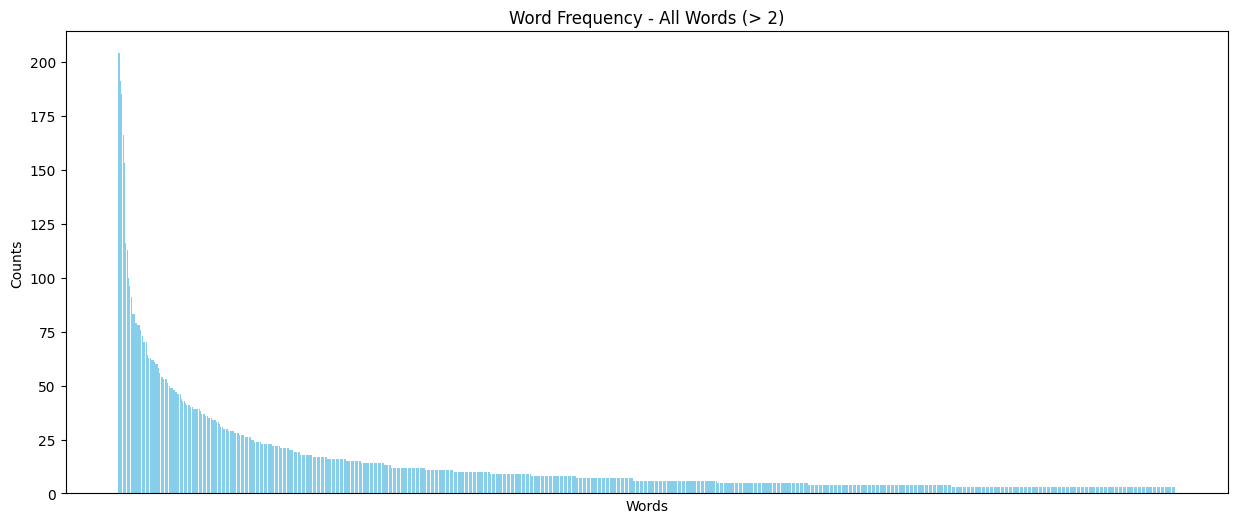

In [13]:
createBarChart(counter_sorted, 'All Words', 2, False)

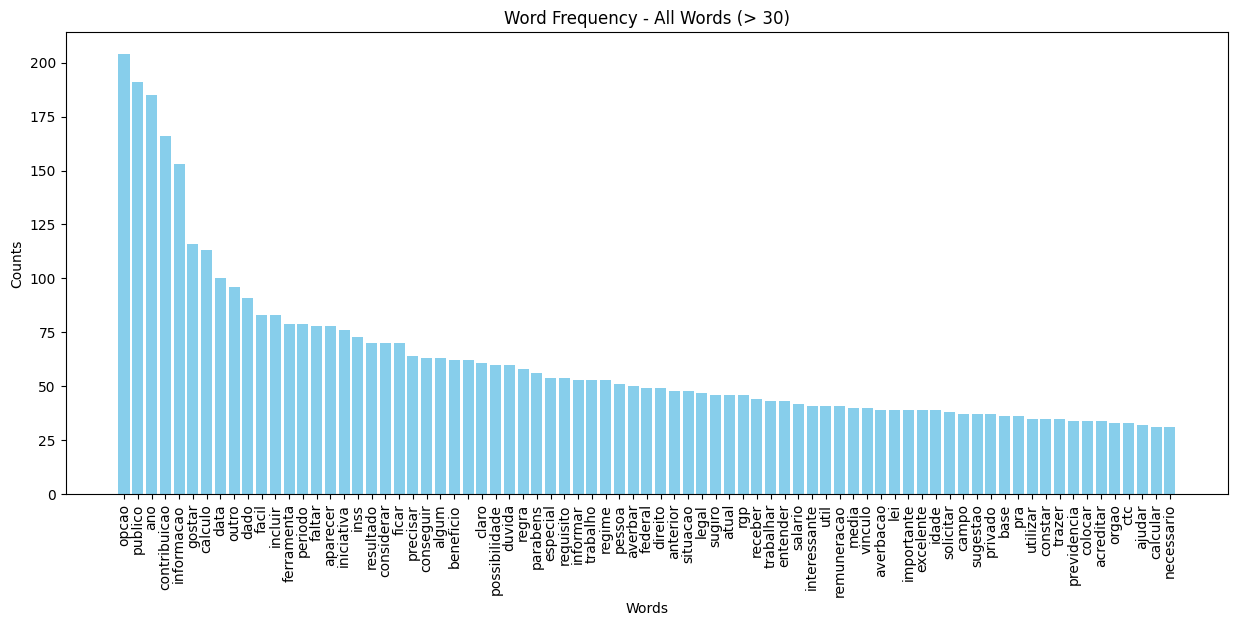

In [14]:
createBarChart(counter_sorted, 'All Words', 30, True)

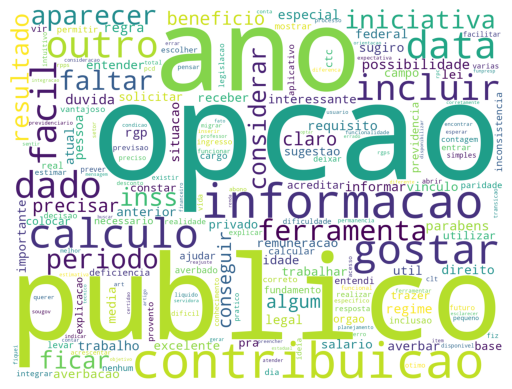

In [15]:
createWordCloud(counter_sorted)

* **Analyzing the words that appear after lemmatization - verbs**

In [16]:
verbs = []
for text in df['clean_text']:
    if not pd.isnull(text): 
        tokens = stem(text)
        verbs += [token.text for token in tokens if token.pos_ == "VERB"]

counter_verbs = Counter(verbs)
counter_verbs_sorted = dict(sorted(counter_verbs.items(), key=lambda item: item[1], reverse=True))
counter_verbs_sorted

{'gostar': 116,
 'dado': 86,
 'incluir': 83,
 'faltar': 78,
 'aparecer': 78,
 'ficar': 70,
 'considerar': 69,
 'conseguir': 63,
 'precisar': 63,
 'duvida': 60,
 'ferramenta': 56,
 'informar': 53,
 'receber': 44,
 'trabalhar': 43,
 'entender': 43,
 'solicitar': 38,
 'sugestao': 37,
 'utilizar': 35,
 'constar': 35,
 'averbar': 35,
 'trazer': 35,
 'requisito': 34,
 'colocar': 34,
 'acreditar': 34,
 'ajudar': 32,
 'calcular': 31,
 'vir': 29,
 'levar': 28,
 'mostrar': 28,
 'permitir': 27,
 'orgao': 27,
 'informacao': 27,
 'entrar': 26,
 'deixar': 25,
 'escolher': 24,
 'estimar': 24,
 'integrar': 24,
 'realizar': 23,
 'situacao': 23,
 'explicar': 22,
 'prever': 22,
 'facilitar': 22,
 'abrir': 21,
 'regra': 20,
 'fiz': 20,
 'ctc': 20,
 'existir': 20,
 'funcionar': 19,
 'pensar': 19,
 'acrescentar': 19,
 'querer': 18,
 'migrar': 18,
 'ferramentar': 17,
 'inserir': 16,
 'indicar': 16,
 'encontrar': 16,
 'esperar': 16,
 'gerar': 15,
 'data': 15,
 'errar': 15,
 'atender': 15,
 'contar': 15,
 'sen

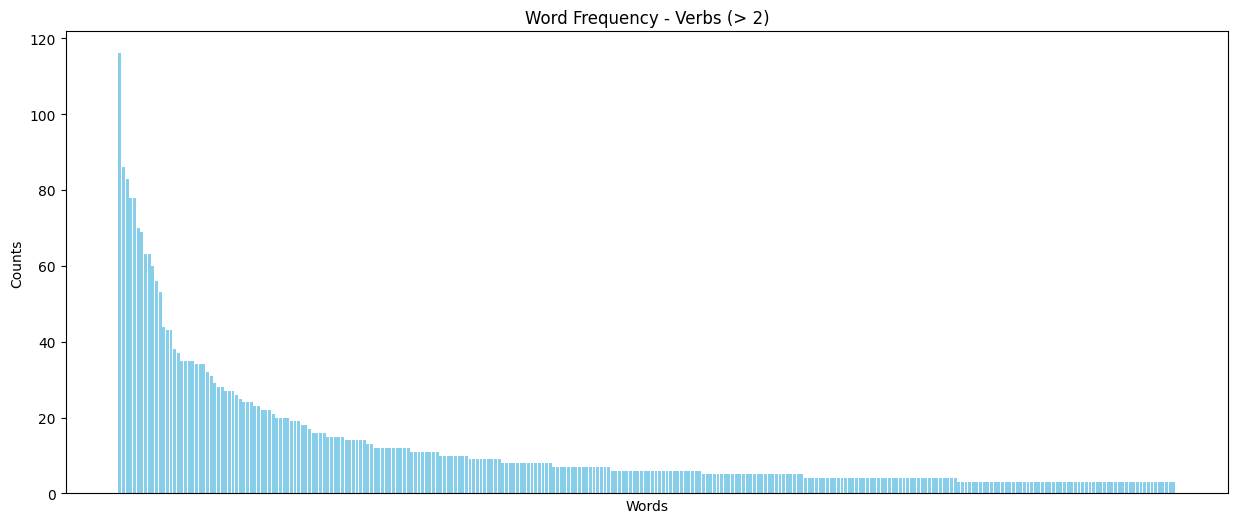

In [17]:
createBarChart(counter_verbs_sorted, 'Verbs', 2, False)

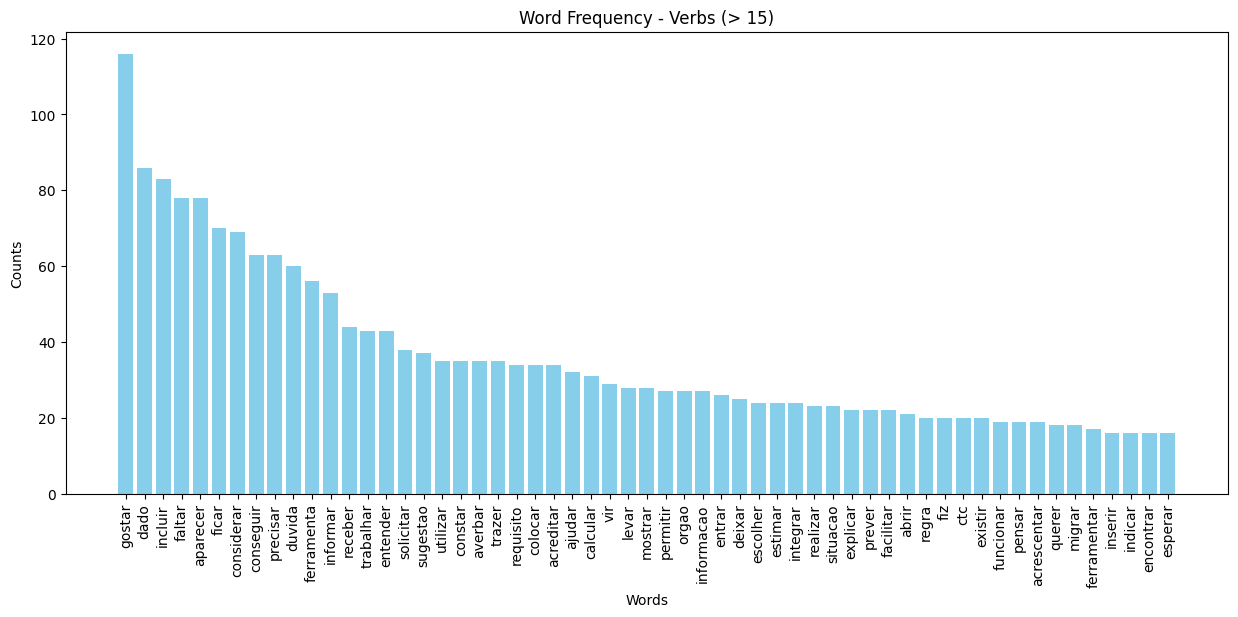

In [18]:
createBarChart(counter_verbs_sorted, 'Verbs', 15, True)

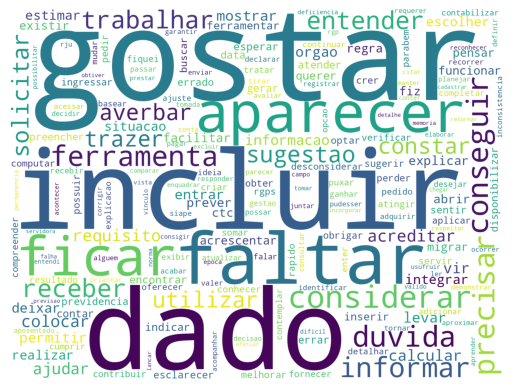

In [19]:
createWordCloud(counter_verbs_sorted)